In [ ]:
!pip install -qU s3fs --user

In [1]:
import pandas as pd
import s3fs

s3_path = "s3://hugging-face-multiclass-textclassification-bucket369/training_data/newsCorpora.csv"
df = pd.read_csv(s3_path, sep = "\t", names = ["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])

In [2]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
df.describe() # not useful

,ID,TIMESTAMP
count,422419.000000,4.224190e+05
mean,211536.764594,1.400445e+12
std,122102.839707,3.733088e+09
min,1.000000,1.394470e+12
25%,105801.500000,1.397349e+12
50%,211655.000000,1.399990e+12
75%,317273.500000,1.403775e+12
max,422937.000000,1.409229e+12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422419 non-null  int64 
 1   TITLE      422419 non-null  object
 2   URL        422419 non-null  object
 3   PUBLISHER  422417 non-null  object
 4   CATEGORY   422419 non-null  object
 5   STORY      422419 non-null  object
 6   HOSTNAME   422419 non-null  object
 7   TIMESTAMP  422419 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [5]:
df_work = df.copy()

In [6]:
df_work = df_work[['TITLE', 'CATEGORY']]
df_work

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m
422415,Boy to have surgery on esophagus after battery...,m
422416,Child who swallowed battery to have reconstruc...,m
422417,Phoenix boy undergoes surgery to repair throat...,m


In [7]:
my_dict = {
    'e':'Entertainment',
    'b': 'Business',
    't': 'Science',
    'm': 'Health'
}

In [8]:
def update_category(x):
    return my_dict[x]

df_work['CATEGORY'] = df_work['CATEGORY'].apply(lambda x: update_category(x))

In [9]:
df_work

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",Business
1,Fed's Charles Plosser sees high bar for change...,Business
2,US open: Stocks fall after Fed official hints ...,Business
3,"Fed risks falling 'behind the curve', Charles ...",Business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Business
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,Health
422415,Boy to have surgery on esophagus after battery...,Health
422416,Child who swallowed battery to have reconstruc...,Health
422417,Phoenix boy undergoes surgery to repair throat...,Health


In [10]:
import random

def get_random_title_by_category(category): 
    filtered_df = df_work[df_work['CATEGORY']==category] #Health

    # return filtered_df['TITLE'].sample(5).values[:]
    return filtered_df['TITLE'].sample().values[0]


In [11]:
category = 'Health'

random_title = get_random_title_by_category(category)

print(random_title)

Ebola crisis deepens as death toll reaches 500+


In [66]:
df_work['CATEGORY'].value_counts().index

Index(['Entertainment', 'Business', 'Science', 'Health'], dtype='object', name='CATEGORY')

In [12]:
!pip install -qU seaborn

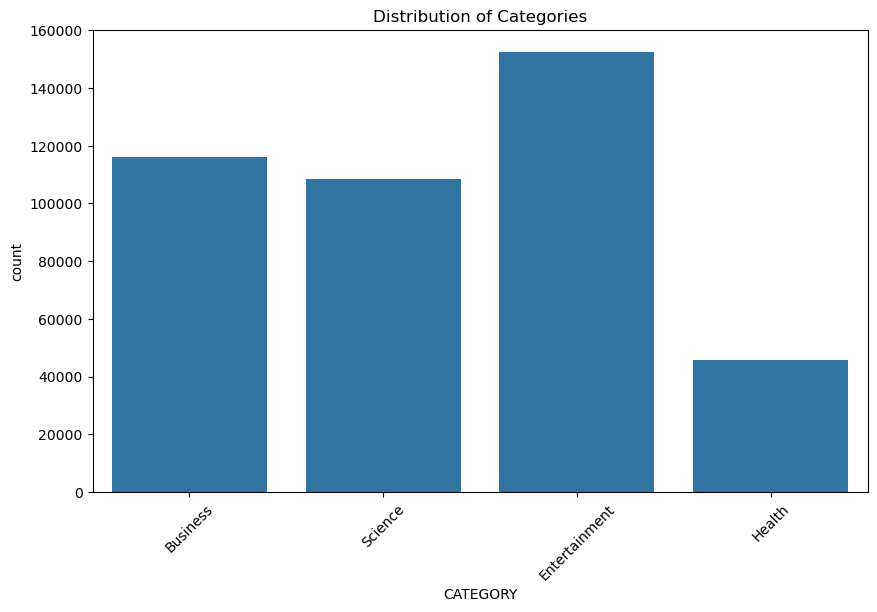

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#bar chart
plt.figure(figsize=(10,6))
# sns.countplot(data=df_work, x="CATEGORY", order = df_work['CATEGORY'].value_counts().index)
sns.countplot(data=df_work, x="CATEGORY")
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()

CATEGORY
Entertainment    152469
Business         115967
Science          108344
Health            45639
Name: count, dtype: int64


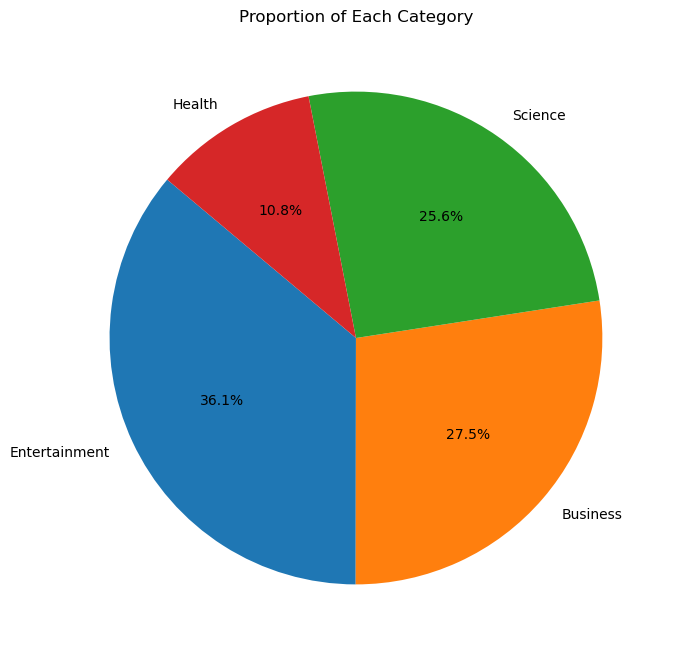

In [14]:
category_counts = df_work['CATEGORY'].value_counts()
print(category_counts)
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', startangle=140)
# plt.pie(x=category_counts, labels=category_counts.index)
plt.title('Proportion of Each Category')
plt.show()